This TP was done by: Clara Chelala and Vitor de Sousa França



In [2]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2023-03-11 03:27:06.557771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 03:27:13.285641: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 03:27:13.285771: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 03:28:49.048658: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

5


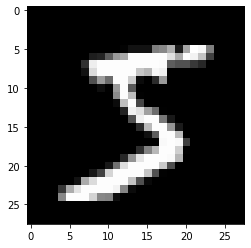

In [57]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [58]:
#Spliting test data
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

In [59]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [60]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([6, 7, 6, 7, 7, 6, 6, 5, 6, 7, 5, 6, 9, 6, 6, 2, 5, 6, 6, 6, 8, 7,
       6, 7, 2, 9, 6, 6, 0, 7, 6, 6, 6, 7, 5, 7, 6, 7, 2, 6, 6, 6, 2, 6,
       2, 6, 6, 7, 2, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 7, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 7, 6, 7, 6, 6, 9, 6, 7, 7, 9, 6, 9, 5, 6, 6, 6, 7,
       0, 7, 5, 6, 5, 7, 6, 5, 2, 6, 6, 7])

In [61]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

## Given 

In [62]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

#x_train_batch = x_train[:8]
#y_train_batch = y_train[:8]
#with tf.GradientTape() as tape:
#        # Run the forward pass of the layer.
#        # The operations that the layer applies
#        # to its inputs are going to be recorded
#        # on the GradientTape.
#        logits = model(x_train_batch)  # Logits for this minibatch
#
#        # Compute the loss value for this minibatch.
#        loss_value = loss(y_train_batch, logits)
#
## Use the gradient tape to automatically retrieve
## the gradients of the trainable variables with respect to the loss.
#grad = tape.gradient(loss_value, model.trainable_weights)
#
### Updating weights
#
#def update_weights(model, update):
#    new_weights = model.trainable_weights.copy()
#    for i in range(len(new_weights)):
#        new_weights[i] = new_weights[i] + update[i]
#    model.set_weights(new_weights)
#
#
### Evaluate model
#samples_for_evaluation = np.random.randint(0, 10000, 1000)
#logits = model(x_train[samples_for_evaluation])
#loss(y_train[samples_for_evaluation], logits).numpy()
#    

## 4 Model

**Q4.1**: The number of parameters can be obtained by multipling the number of neurons plus 1 (the bias term) of each layer. 

Since our model are: 


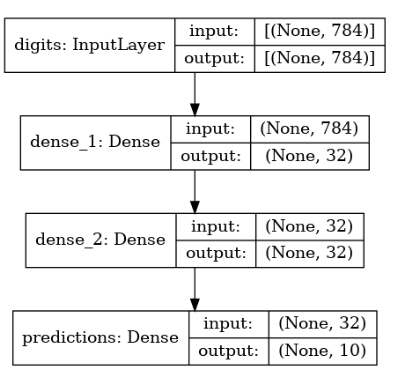

We're going to training $26,506$ optimization variables.

## 5 Stocasthic Gradient Descent

### 5.1

In [63]:
def create_model():

    # source: https://keras.io/guides/training_with_built_in_methods/

    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(32, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation=None, name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    return (model, loss)

    

In [64]:
## Updating weights
def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)

In [65]:
def SGD(X_train, y_train, model, batch_size, lbd0=1, step_loss = 0):
    
    #Starting lists of errors
    losses_list = []
    iteration_list = []

    #Number of 
    N = X_train.shape[0]
    #Number of iterations necessary for use all the data
    number_of_iterations = int(np.ceil(N/batch_size)) 

    if not(step_loss):
        step_loss =  number_of_iterations // 100

    # Random index for batch  
    idex = np.arange(N)
    np.random.shuffle(idex)
    splitted_idex = np.array_split(idex, number_of_iterations)
    
    

    for k, idex  in enumerate(splitted_idex):
        
        # Creating batchs 
        x_train_batch = x_train[idex]
        y_train_batch = y_train[idex]

        # recalculating lbd
        lbd = lbd0/np.sqrt(k+1)

        # Forward pass
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.

            # Logits for this minibatch
            logits = model(x_train_batch)   
            # Compute the loss value for this minibatch.
            loss_value = loss(y_train_batch, logits)

        # The weights grandient with respect to the loss function 
        grad = tape.gradient(loss_value, model.trainable_weights)

        # Gradient Descent update
        update = [tf.math.scalar_mul(-lbd/batch_size, g) for g in grad]

        # Updating weight values
        update_weights(model, update)
            
        if not(k % step_loss):                
            ## Evaluate model
            loss_value = loss(y_train, model(x_train)).numpy()
            ## Save step 
            iteration_list.append(k)
            ## Save error values
            losses_list.append(loss_value)
            ## Print
            print(f"iteration: {k}/{number_of_iterations}" \
                  f" -> error_value={loss_value:.4f}")
    return (losses_list, iteration_list)


### 5.2

In [66]:
#restart the model
model, loss = create_model()

start_time = time.time()

# Stochastic Gradient Descent algorithm
errors, steps = SGD(x_train, y_train, model, batch_size = 1, 
                    lbd0 = 0.5, step_loss = 2000)

end_time = time.time()
total_time = end_time - start_time

print("---------------------------------------------")
print(f"Total time to peform STD with batch_size = 1")
print(f"time = {int(total_time)//60}min {int(total_time%60)}s")

iteration: 0/60000 -> error_value=2.6819
iteration: 2000/60000 -> error_value=2.3028
iteration: 4000/60000 -> error_value=2.2108
iteration: 6000/60000 -> error_value=1.9778
iteration: 8000/60000 -> error_value=1.9160
iteration: 10000/60000 -> error_value=1.9145
iteration: 12000/60000 -> error_value=1.8614
iteration: 14000/60000 -> error_value=1.8198
iteration: 16000/60000 -> error_value=1.7299
iteration: 18000/60000 -> error_value=2.2594
iteration: 20000/60000 -> error_value=1.4161
iteration: 22000/60000 -> error_value=1.4978
iteration: 24000/60000 -> error_value=1.2924
iteration: 26000/60000 -> error_value=1.2678
iteration: 28000/60000 -> error_value=1.2724
iteration: 30000/60000 -> error_value=1.2445
iteration: 32000/60000 -> error_value=1.1943
iteration: 34000/60000 -> error_value=1.1558
iteration: 36000/60000 -> error_value=1.2972
iteration: 38000/60000 -> error_value=1.1353
iteration: 40000/60000 -> error_value=1.1638
iteration: 42000/60000 -> error_value=1.1411
iteration: 44000/6

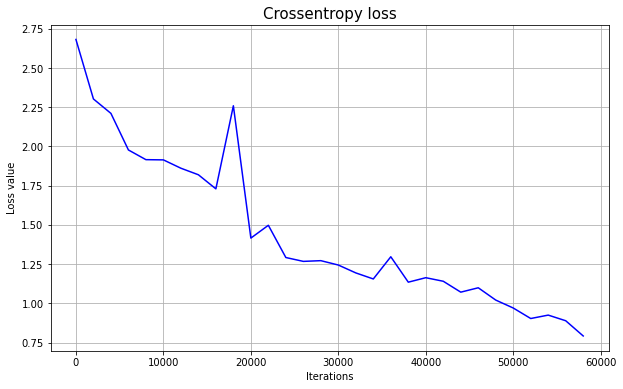

Final error = 0.792


In [67]:
fig = plt.figure(figsize=(10, 6))

plt.plot(steps, errors, "-b")

plt.title("Crossentropy loss", fontsize=15)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.grid(True)
plt.show()
print(f"Final error = {errors[-1]:.3f}")

## 6 Empirical risk minimization

## 6.1 and 6.3

In [68]:
def SDG_epoch(X_train, y_train, model, number_of_epochs, batch_size, lbd0=1, step_loss = 0):
    loss_per_epoch = []
    for epoch in range(number_of_epochs):
        loss_per_iteration, _ =  SGD(X_train, y_train, model, batch_size, lbd0, step_loss)
        loss_per_epoch.append(loss_per_iteration)
    return loss_per_epoch


In [69]:
#restart the model
model, loss = create_model()

start_time = time.time()
batch_size = 32
# Mini-batch SGD algorithm
errors = SDG_epoch(x_train, y_train, model, number_of_epochs = 10, batch_size = batch_size, lbd0 = 0.5, step_loss = 1000)

end_time = time.time()
total_time = end_time - start_time
print("---------------------------------------------")
print(f"Total time to peform Minibatch-STD with batch_size = {batch_size}:")
print(f"time = {int(total_time)//60}min {int(total_time%60)}s")

iteration: 0/1875 -> error_value=2.3339
iteration: 1000/1875 -> error_value=2.0906
iteration: 0/1875 -> error_value=1.9809
iteration: 1000/1875 -> error_value=1.6218
iteration: 0/1875 -> error_value=1.4687
iteration: 1000/1875 -> error_value=1.1419
iteration: 0/1875 -> error_value=1.0462
iteration: 1000/1875 -> error_value=0.8607
iteration: 0/1875 -> error_value=0.8085
iteration: 1000/1875 -> error_value=0.7024
iteration: 0/1875 -> error_value=0.6726
iteration: 1000/1875 -> error_value=0.6075
iteration: 0/1875 -> error_value=0.5938
iteration: 1000/1875 -> error_value=0.5455
iteration: 0/1875 -> error_value=0.5379
iteration: 1000/1875 -> error_value=0.5024
iteration: 0/1875 -> error_value=0.4947
iteration: 1000/1875 -> error_value=0.4700
iteration: 0/1875 -> error_value=0.4638
iteration: 1000/1875 -> error_value=0.4456
---------------------------------------------
Total time to peform Minibatch-STD with batch_size = 32:
time = 3min 34s


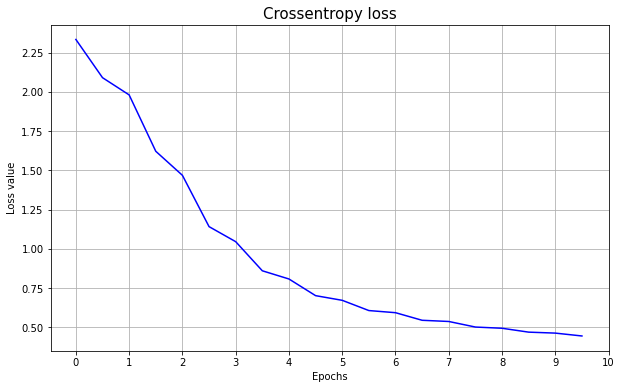

Final error = 0.446


In [70]:
fig = plt.figure(figsize=(10, 6))

step_xticks = len(errors[0])
#put all the errors in one 1D array
errors_array = np.array(errors).flatten()

plt.plot(errors_array, "-b")
plt.xticks(ticks=np.arange(0, errors_array.shape[0]+1, step_xticks), labels=np.arange(len(errors)+1))
#plt.yscale("log")
plt.title("Crossentropy loss", fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.grid(True)
plt.show()
print(f"Final error = {errors_array[-1]:.3f}")

**Q6.2**: With this scheme we're capable of training the model with less computational cost associated to it, even obtaining smaller error values.

**Q6.3**: *SDG_epoch* function

## Evaluation of the model

In [71]:
accuracy = keras.metrics.SparseCategoricalAccuracy()
accuracy.update_state(y_train, model(x_train))
print(f"Accuracy using the train set: {accuracy.result().numpy():.3f}")

Accuracy using the train set: 0.878


In [72]:
accuracy.update_state(y_test, model(x_test))
print(f"Accuracy using the test set {accuracy.result().numpy():.3f}")

Accuracy using the test set 0.879


As expected, we obtained a training error smaller than the test error, since the latter is done with data not used for learning the neural network.